In [40]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# EDA,visualizations are done using tableau ,the files are attached ,please go through them

In [2]:
df_org=pd.read_csv('C:\\Users\\Gaurav Yadav\\Downloads\\PoliceKillingsUS.csv',encoding='cp1252')
df=df_org.copy()
df.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [3]:
df.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [4]:
#dropping unrelevent columns and applying imputation for missing values
df1=df.drop(columns=['id','name','date'])
print(df1.isna().sum())
df1.head()


manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


manner_of_death       armed   age gender race           city state  \
0              shot         gun  53.0      M    A        Shelton    WA   
1              shot         gun  47.0      M    W          Aloha    OR   
2  shot and Tasered     unarmed  23.0      M    H        Wichita    KS   
3              shot  toy weapon  32.0      M    W  San Francisco    CA   
4              shot    nail gun  39.0      M    H          Evans    CO   

   signs_of_mental_illness threat_level         flee  body_camera  
0                     True       attack  Not fleeing        False  
1                    False       attack  Not fleeing        False  
2                    False        other  Not fleeing        False  
3                     True       attack  Not fleeing        False  
4                    False       attack  Not fleeing        False

In [5]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df1.iloc[:,2:3].values)
df1['age']=imputer.transform(df1.iloc[:,2:3].values)

#imputation for categorical features
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(df1.iloc[:,4:5].values)

df1['race']=imputer.transform(df1.iloc[:,4:5].values)
imputer.fit(df1.iloc[:,9:10].values)

df1['flee']=imputer.transform(df1.iloc[:,9:10].values)
imputer.fit(df1.iloc[:,1:2].values)
df1['armed']=imputer.transform(df1.iloc[:,1:2].values)




{'whiskers': [<matplotlib.lines.Line2D at 0x268866add30>,
 'caps': [<matplotlib.lines.Line2D at 0x268866ca430>,
 'boxes': [<matplotlib.lines.Line2D at 0x268866ad9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x268866caaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268866cae50>],
 'means': []}

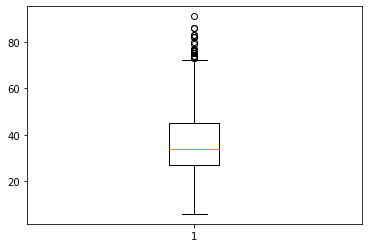

In [6]:
plt.boxplot(df1['age'])
#from boxplot it is evident there are some outliers

In [9]:
df1.head()

manner_of_death       armed   age gender race           city state  \
0              shot         gun  53.0      M    A        Shelton    WA   
1              shot         gun  47.0      M    W          Aloha    OR   
2  shot and Tasered     unarmed  23.0      M    H        Wichita    KS   
3              shot  toy weapon  32.0      M    W  San Francisco    CA   
4              shot    nail gun  39.0      M    H          Evans    CO   

   signs_of_mental_illness threat_level         flee  body_camera  
0                     True       attack  Not fleeing        False  
1                    False       attack  Not fleeing        False  
2                    False        other  Not fleeing        False  
3                     True       attack  Not fleeing        False  
4                    False       attack  Not fleeing        False

In [20]:
#encoding categorical info
le=LabelEncoder()
l=[0,3,5,6,7,9,10]
for i in l:
    
    df1[df1.columns[i]]=le.fit_transform(df1.iloc[:,i:i+1].values)
y=df1.iloc[:,0].values
df1=pd.get_dummies(df1,columns=['armed','race','threat_level'])
df1.head()



manner_of_death   age  gender  city  state  signs_of_mental_illness  flee  \
0                0  53.0       1  1164     47                        1     2   
1                0  47.0       1    21     37                        0     2   
2                1  23.0       1  1381     16                        0     2   
3                0  32.0       1  1123      4                        1     2   
4                0  39.0       1   403      5                        0     2   

   body_camera  armed_Taser  armed_air conditioner  ...  armed_vehicle  \
0            0            0                      0  ...              0   
1            0            0                      0  ...              0   
2            0            0                      0  ...              0   
3            0            0                      0  ...              0   
4            0            0                      0  ...              0   

   race_A  race_B  race_H  race_N  race_O  race_W  threat_level_attack  \
0       1       0       0       0       0       0                    1   
1       0       0       0       0       0       1                    1   
2       0       0       1       0       0       0                    0   
3       0       0       0       0       0       1                    1   
4       0       0       1       0       0       0                    1   

   threat_level_other  threat_level_undetermined  
0                   0                          0  
1                   0                          0  
2                   1                          0  
3                   0                          0  
4                   0                          0  

[5 rows x 85 columns]

# Balancing the class imbalance 

In [21]:
#as it is a problem of imbalance class so balancing the class
sm=SMOTE()
x,y=sm.fit_resample(df1.iloc[:,1:].values,df1['manner_of_death'].values)



# Splitting the data into training and test set,and applying feature scaling

In [22]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_te=sc.transform(x_te)

# model training

In [23]:
#logistic regression
log=LogisticRegression()
log.fit(x_tr,y_tr)
y_pr=log.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_pr,y_te)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       467
           1       0.78      0.81      0.80       479

    accuracy                           0.79       946
   macro avg       0.79      0.79      0.79       946
weighted avg       0.79      0.79      0.79       946



array([[355,  89],
       [112, 390]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

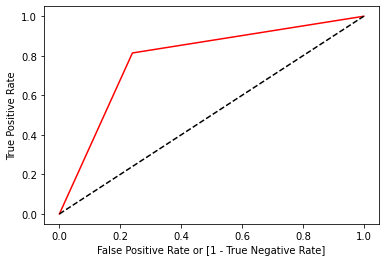

In [35]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc=roc_auc_score(y_te,y_pr)


Text(0, 0.5, 'True Positive Rate')

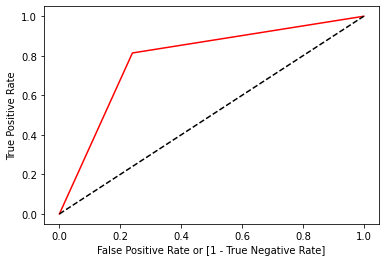

In [37]:
#roc curve
plt.plot(fpr,tpr,color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [45]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)

In [46]:
print(classification_report(y_te,y_pr))
confusion_matrix(y_pr,y_te)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       467
           1       0.99      0.93      0.96       479

    accuracy                           0.96       946
   macro avg       0.96      0.96      0.96       946
weighted avg       0.96      0.96      0.96       946



array([[461,  32],
       [  6, 447]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

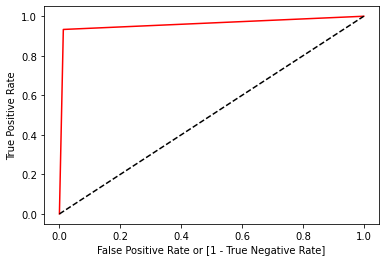

In [48]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc=roc_auc_score(y_te,y_pr)
#roc curve
plt.plot(fpr,tpr,color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [49]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_tr,y_tr)
y_pr=knn.predict(x_te)

In [50]:
print(classification_report(y_te,y_pr))
confusion_matrix(y_pr,y_te)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       467
           1       0.86      0.98      0.91       479

    accuracy                           0.91       946
   macro avg       0.92      0.91      0.91       946
weighted avg       0.92      0.91      0.91       946



array([[389,  10],
       [ 78, 469]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

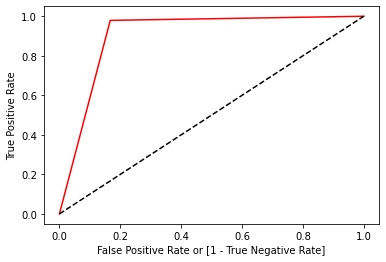

In [51]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc=roc_auc_score(y_te,y_pr)
#roc curve
plt.plot(fpr,tpr,color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Model validation

In [52]:
from sklearn.model_selection import KFold,cross_val_score

In [53]:
#logistic regression model's validation
kfold = KFold(n_splits=10, random_state=0)

results = cross_val_score(log, x,y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

0.7219922420897982


C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
#random forest model's validation
kfold = KFold(n_splits=10, random_state=0)

results = cross_val_score(rf, x,y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9634244992295841


In [56]:
#knearest neighbors model's validation
kfold = KFold(n_splits=10, random_state=0)

results = cross_val_score(knn, x,y, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7836412011323324


In [57]:
'''from mean accuracies of model's with different subsets of data set we can see mean accuracy in randomforest is 
almost equal to our random forest model's accuracy this means out model is having good consistency''' 


"from mean accuracies of model's with different subsets of data set we can see mean accuracy in randomforest is \nalmost equal to our random forest model's accuracy this means out model is having good consistency"

# we will use random forest model bcz it has maximum accuracy on given dataset